In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image
import os
import scipy
import cv2
%matplotlib inline
sns.set_style('white')

In [4]:
from vzam import *

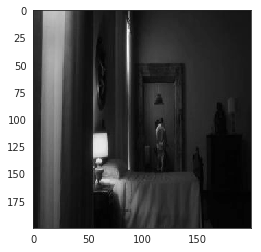

In [4]:
test_img = 'test_images/img2.jpg'

img = Image.open(test_img).convert('L').resize((200, 200))

nimg = np.array(img)

plt.imshow(nimg, cmap='gray', vmin=0, vmax=256)
plt.show()

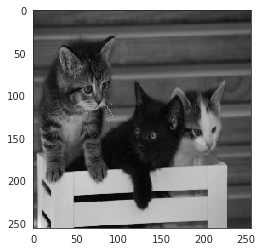

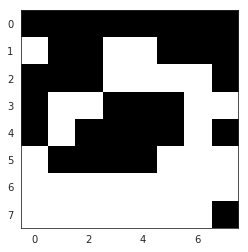

In [10]:
img = Image.open('test_images/cats_grey.jpg').convert('L').resize((256, 256))
plt.imshow(img, vmin=0, vmax=256, cmap='gray')
plt.show()
plt.imshow(rHash(img).reshape((8, 8)), vmin=0, vmax=1, cmap='gray')
plt.show()

In [6]:
IMAGES_DIR = 'test_images'

In [7]:
fnames = [os.path.join(IMAGES_DIR, fname) for fname in os.listdir(IMAGES_DIR)]
imnames = [fname for fname in os.listdir(IMAGES_DIR)]
images = [ cv2.imread(fname) for fname in fnames]
pil_images = [ Image.fromarray(img).convert('L').resize((256, 256)) for img in images]

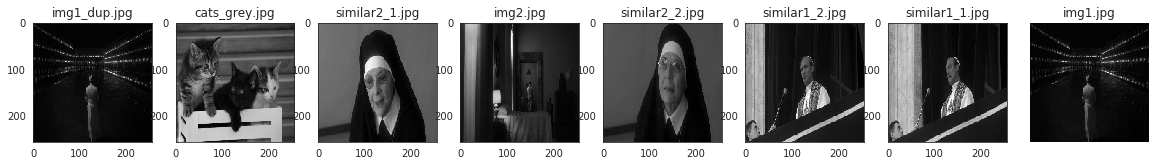

In [8]:
plt.figure(figsize=(20, 10))
i = 0
for img in pil_images:
    
    plt.subplot(1, len(images), i+1)
    plt.title(imnames[i])
    plt.imshow(img, cmap='gray')
    i+=1
plt.axis('off')
plt.show()

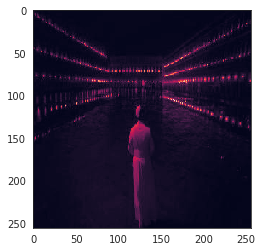

In [9]:
plt.imshow(pil_images[0])
plt.show()

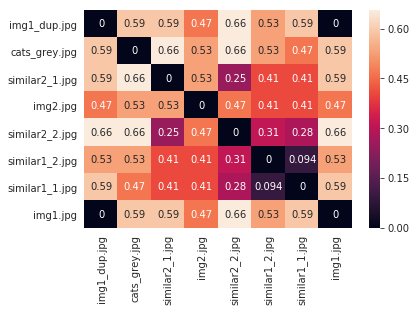

In [17]:
hashes = [quandrant_rHash(img) for img in pil_images]
distances = scipy.spatial.distance.cdist(hashes, hashes, metric='hamming')   
sns.heatmap(distances, annot=True, xticklabels=imnames, yticklabels=imnames)

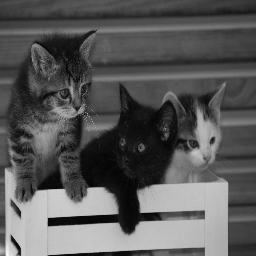

In [11]:
target_img = img
target_img

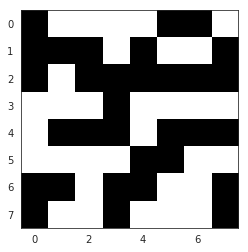

In [12]:
plt.imshow(quandrant_rHash(target_img).reshape((8,8)), vmin=0, vmax=1, cmap='gray')

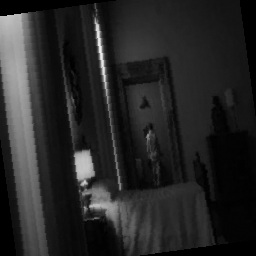

In [78]:
corrupted_target_img = random_corrupt(target_img)
corrupted_target_img

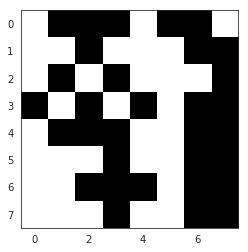

In [79]:
plt.imshow(quandrant_rHash(corrupted_target_img).reshape((8,8)), vmin=0, vmax=1, cmap='gray')

In [80]:
scipy.spatial.distance.cdist([quandrant_rHash(target_img)], [quandrant_rHash(corrupted_target_img)], metric='hamming')


array([[0.21875]])

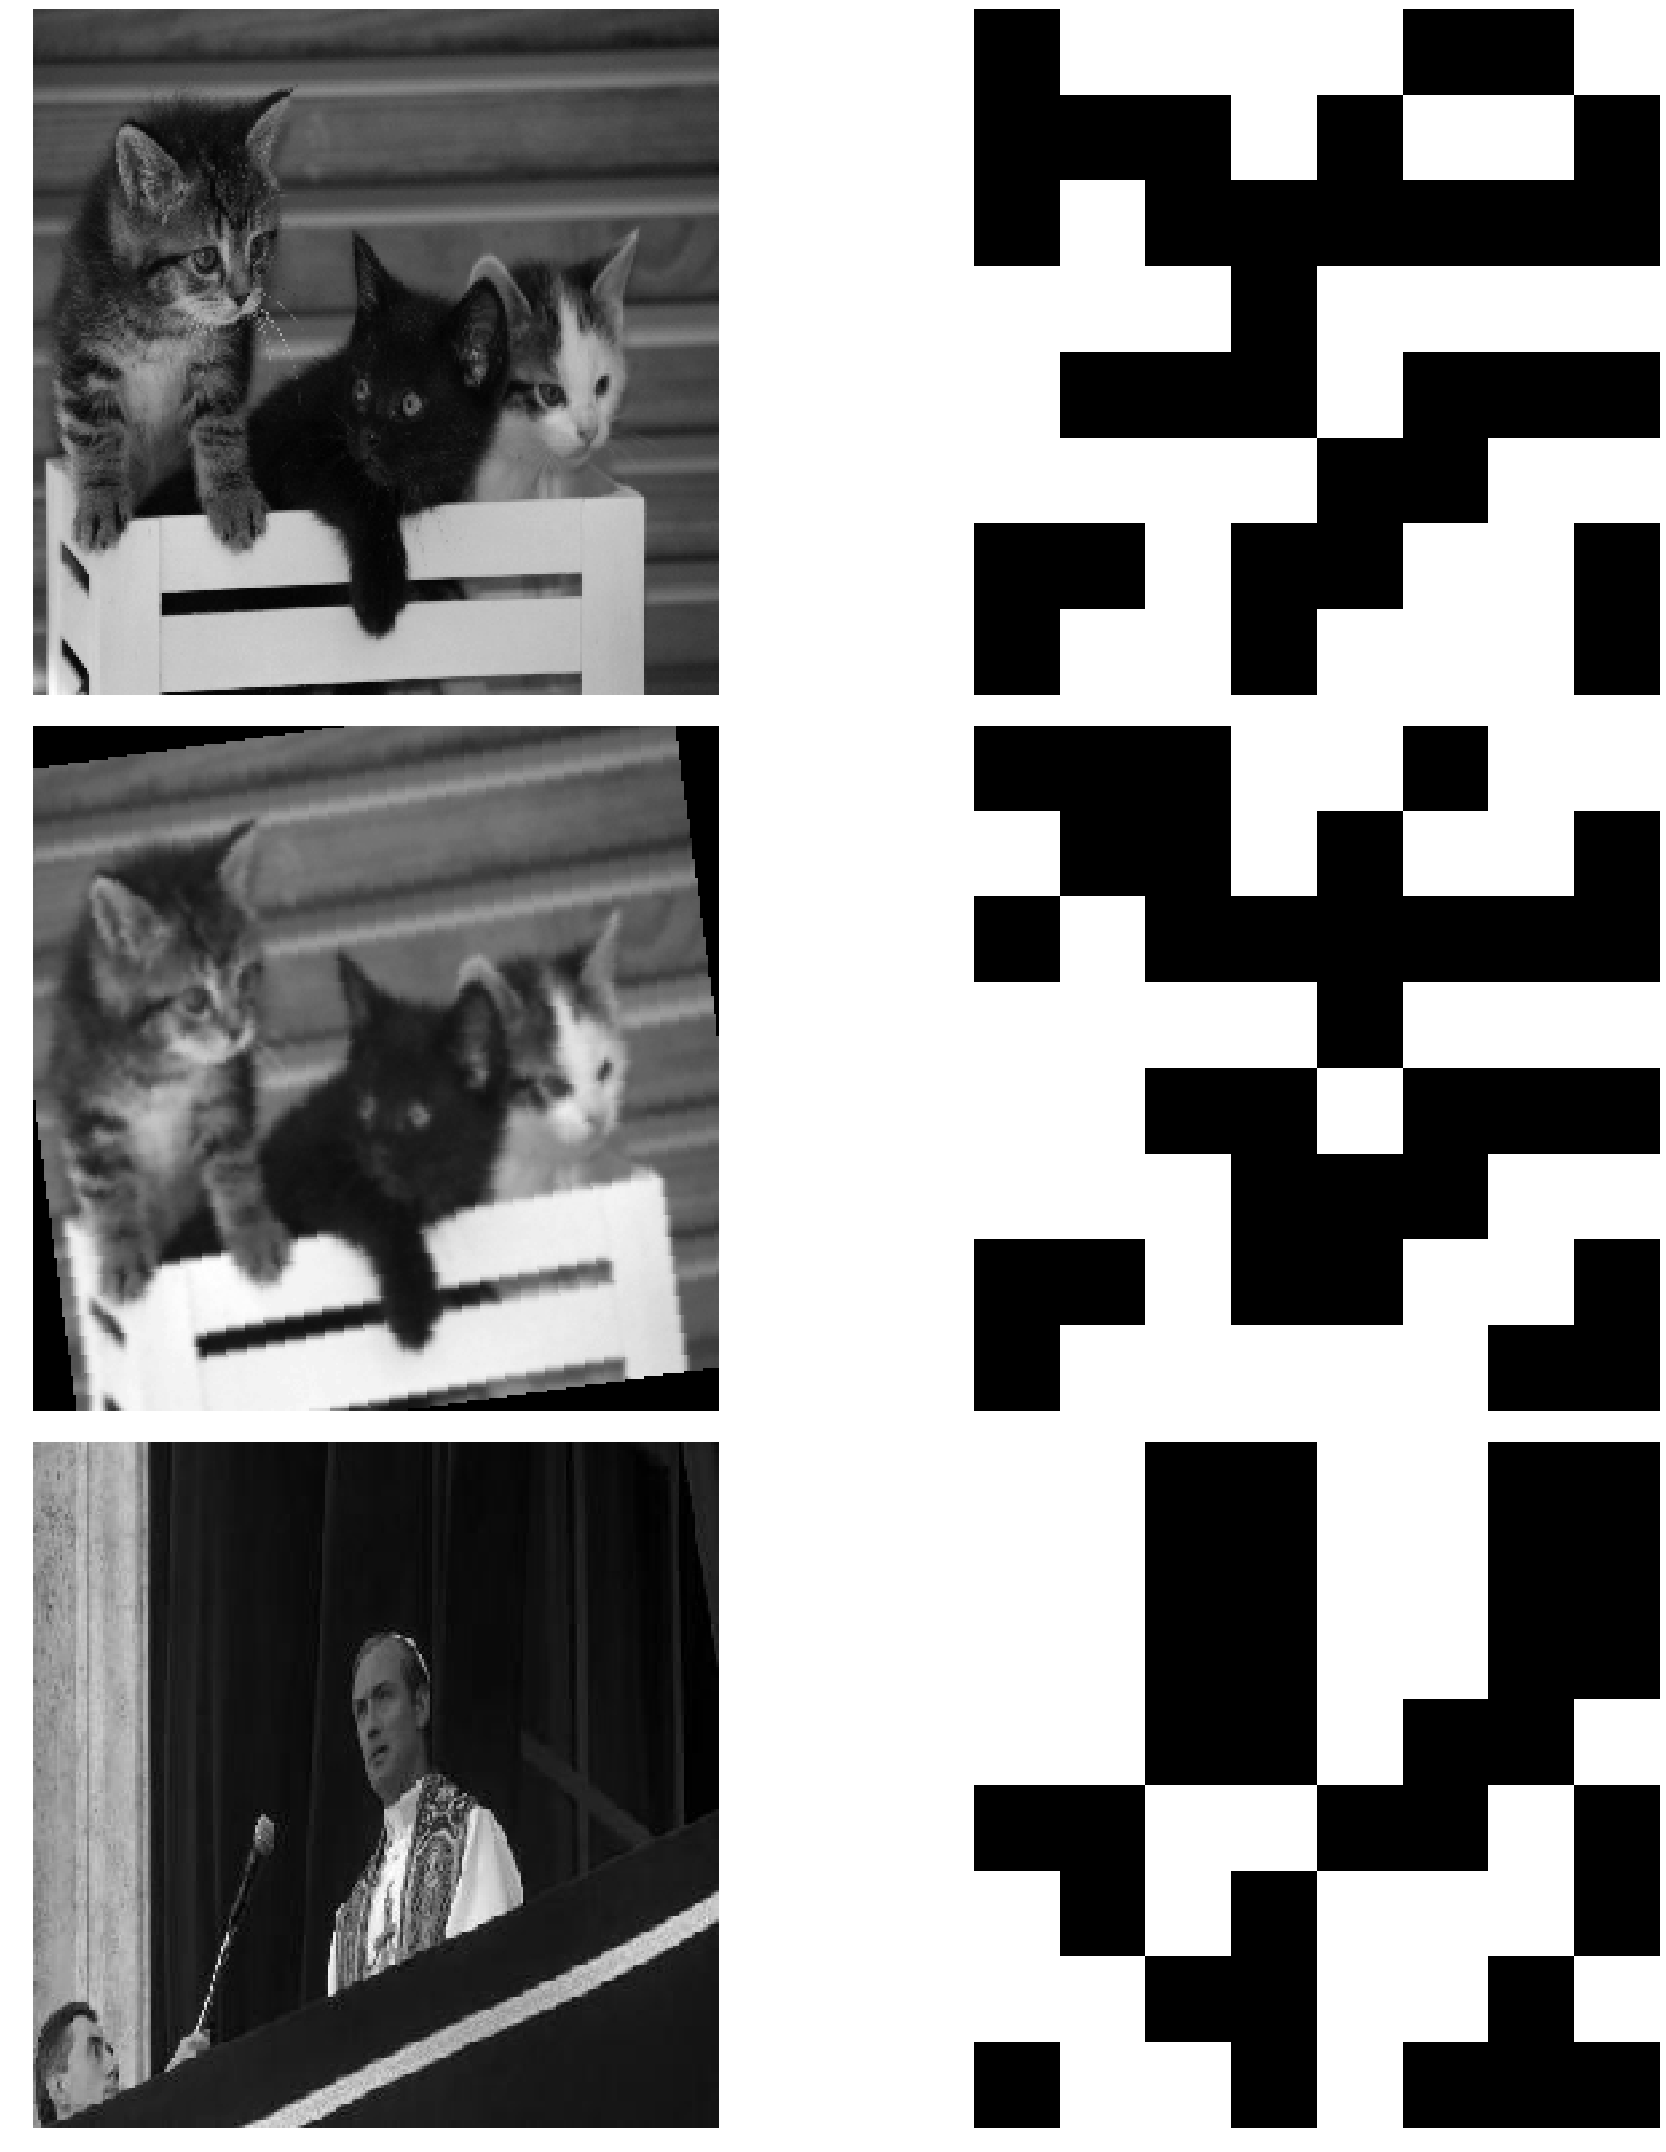

In [57]:
target_img = img
comparison_img = pil_images[5]
corrupted_target_img = random_corrupt(target_img)

plt.figure(figsize=(30, 30))

plt.subplot(3, 2, 1)
plt.imshow(target_img, cmap='gray')
# plt.tight_layout()
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(quandrant_rHash(target_img, hash_size=64).reshape((8,8)), vmin=0, vmax=1, cmap='gray')
# plt.tight_layout()
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(corrupted_target_img, cmap='gray')
# plt.tight_layout()
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(quandrant_rHash(corrupted_target_img, hash_size=64).reshape((8,8)), vmin=0, vmax=1, cmap='gray')
# plt.tight_layout()
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(comparison_img.resize(target_img.size), cmap='gray')
# plt.tight_layout()
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(quandrant_rHash(comparison_img, hash_size=64).reshape((8,8)), vmin=0, vmax=1, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.savefig('rhash_comparison.png')
plt.show()

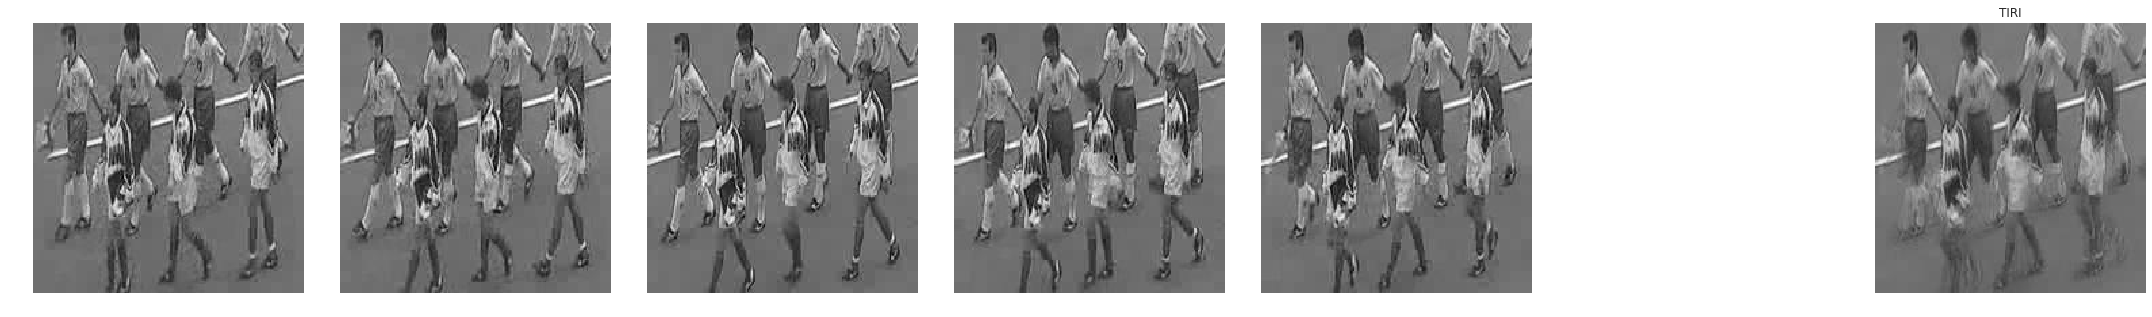

In [17]:
pics = [os.path.join('notebooks/pics', p) for p in sorted(os.listdir('notebooks/pics'))]
plt.figure(figsize=(30, 10))
for i, pic in enumerate(pics[:-1]):
    plt.subplot(1, 7, i+1)
    pic = cv2.imread(pic)
    plt.axis('off')
    plt.imshow(pic, cmap='gray')

plt.subplot(1, 7, 7)
pic = cv2.imread(pics[-1])
plt.axis('off')
plt.title('TIRI')
plt.imshow(pic, cmap='gray')


plt.tight_layout()
plt.savefig('tiri.png')
plt.show()
